In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

In [2]:
dtype = 't'
database_name = "sociology-jstor"

In [3]:
cnt = get_cnt('%s.doc'%database_name, ['fy',comb(dtype,'fy'),dtype,'c'])
ysum = load_variable('%s.%s.ysum' % (database_name, dtype))

Loaded keys: dict_keys(['fy', 'fy.t', 't', 'c'])
Available keys: ['a', 'a.c', 'a.fj.fy', 'c', 'c.c', 'c.fa', 'c.fj', 'c.fy', 'c.t', 'fa', 'fa.fj.fy', 'fj', 'fj.fy', 'fj.t', 'fy', 'fy.t', 't']


In [4]:
list(ysum)[:10]

[('across', 'societies'),
 ('health', 'care'),
 ('social', 'status'),
 ('consistent', 'findings'),
 ('universal', 'health'),
 ('differences', 'health'),
 ('across', 'groups'),
 ('social', 'behavior'),
 ('journal', 'health'),
 ('health', 'social')]

# Make the publication year the base year

In [69]:
Counter(dict(cnt['c'])).most_common(30)

[(c(c='Blau and Duncan (1967)'), 557),
 (c(c='Wilson (1987)'), 534),
 (c(c='Goffman (1959)'), 481),
 (c(c='Mead (1934)'), 454),
 (c(c='Goffman (1963)'), 451),
 (c(c='Putnam (2000)'), 437),
 (c(c='Coleman (1990)'), 415),
 (c(c='DiMaggio and Powell (1983)'), 413),
 (c(c='Coleman (1988)'), 412),
 (c(c='Blumer (1969)'), 406),
 (c(c='Meyer and Rowan (1977)'), 405),
 (c(c='Bourdieu (1984)'), 401),
 (c(c='McAdam (1982)'), 394),
 (c(c='Kanter (1977)'), 392),
 (c(c='Thompson (1967)'), 376),
 (c(c='Glaser and Strauss (1967)'), 371),
 (c(c='Garfinkel (1967)'), 361),
 (c(c='Goffman (1961)'), 346),
 (c(c='Tilly (1978)'), 340),
 (c(c='Granovetter (1973)'), 331),
 (c(c='Swidler (1986)'), 329),
 (c(c='Granovetter (1985)'), 327),
 (c(c='Blau (1964)'), 322),
 (c(c='Merton (1957)'), 318),
 (c(c='Radloff (1977)'), 315),
 (c(c='Becker (1963)'), 307),
 (c(c='Blalock (1967)'), 297),
 (c(c='Massey and Denton (1993)'), 294),
 (c(c='Hochschild (1989)'), 282),
 (c(c='Parsons (1951)'), 281)]

In [ ]:
ysum.keys()

In [51]:
ysum[what]

KeyError: t(t='press')

In [49]:
list(ysum)[:5]

[('across', 'societies'),
 ('health', 'care'),
 ('social', 'status'),
 ('consistent', 'findings'),
 ('universal', 'health')]

et
al
p
african
th
war
middle
twentieth
numerous
independent
force
everyday
nineteenth
factor
body
labour
positively
wide
journal
mass
college
male
vast
rights
prior
logistic
paid
smith
despite
nationally
metropolitan
missing
grounded
goods
significant
upward
several
maximum
quarterly
spend
deviant
eastern
males
line
late
regression
measurement
depressive
(p
standard
race
catholic
unit
western
income
soviet
almost
nuclear
took
vice
older
department
united
interaction
important
industrial
qualitative
policy
risk
starting
aspects
reliability
consistently
psychology
opportunity
stressful
determine
latin
opinion
future
administrative
allows
past
around
carolina
parameter
report
wilson
representative
ô
canadian
dummy
material
extensive
weak
five
long
frequently
chicago
press


IndexError: Inconsistent shape between the condition and the input (got (0, 1) and (0,))

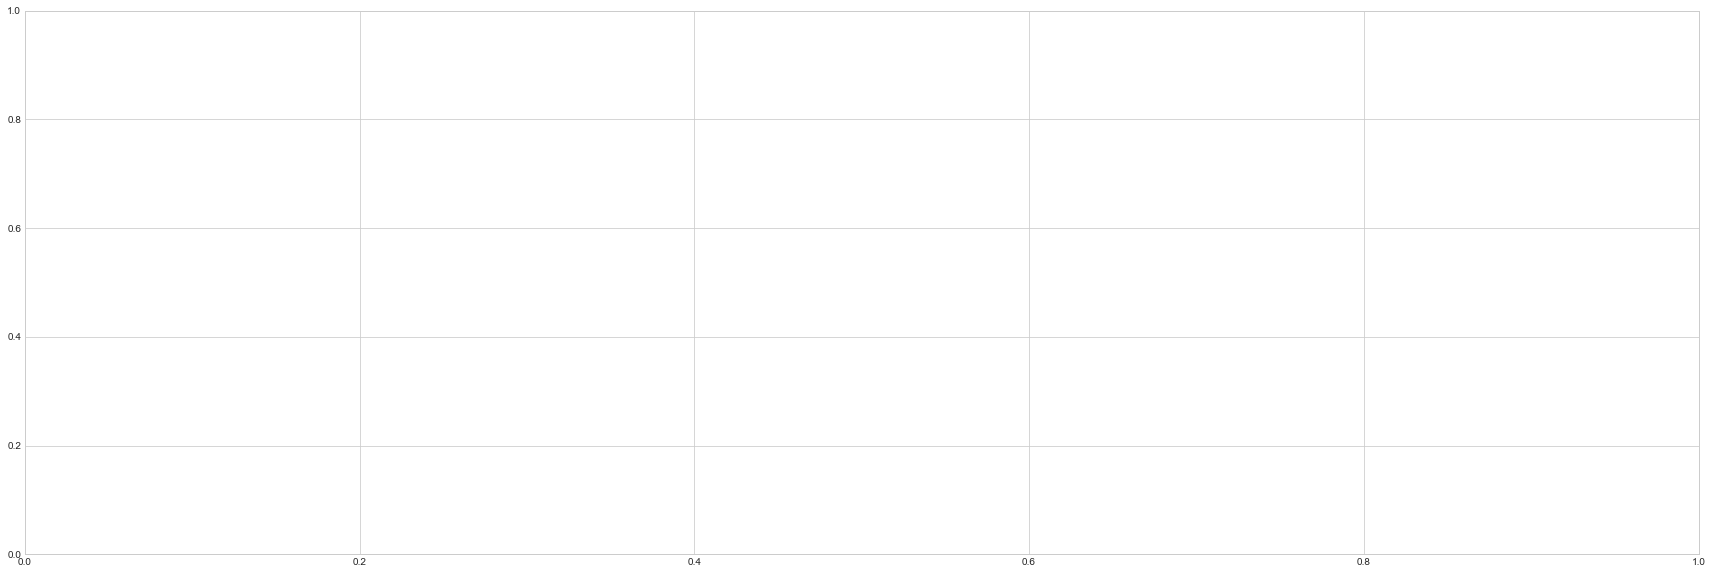

In [59]:
all_years = []


for what, c in Counter( dict( cnt[dtype].items() ) ).most_common(100):    
    what = what.t
    print(what)
    if what not in ysum:
        continue
        
    start_year = ysum[what]['pub']
    year_l = [ cnt[comb(dtype,'fy')][make_cross({"fy":y, dtype:what})] if (y < 2015 and y > start_year) else -10 for y in range(start_year, start_year+50) ]
    all_years.append(year_l)
    
all_years = np.array(all_years)

fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(all_years, ax=ax)

In [31]:
# sorts by their closest neighbors

from scipy.spatial.distance import pdist, squareform
distances = np.array([
    [
        np.sum( np.abs(year1[i]-year2[i]) if (year1[i] != -10 and year2[i] != -10) else 0 for i in range(year1.shape[0]) )
        for year2 in all_years
    ]
    for year1 in all_years
])

seq = [0]
while len(seq) < all_years.shape[0]:
    last_one = seq[-1]
    which_done = np.array([ samp in seq for samp in range( all_years.shape[0] )])
    
    minv = None
    mini = None
    for i in range(distances.shape[0]):
        if i in seq:
            continue
            
        v = distances[i,last_one]
        if minv is None or v < minv:
            mini = i
            minv = v
            
    seq.append(mini)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


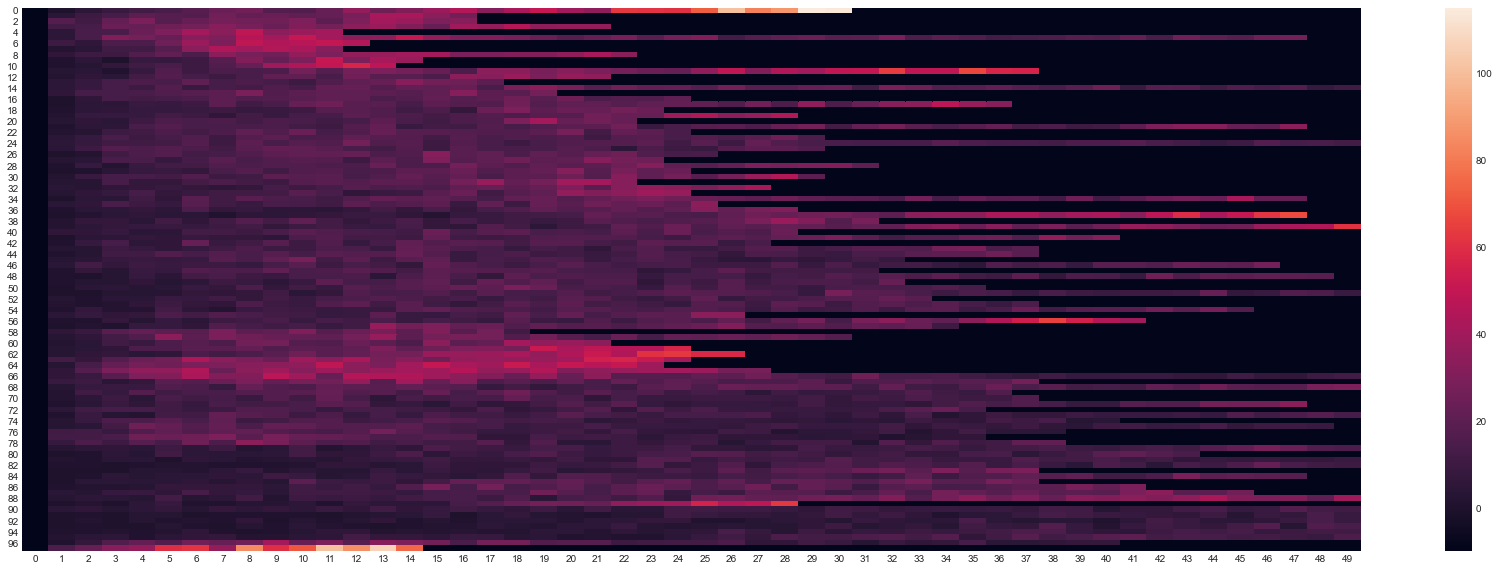

In [34]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(all_years[seq,], ax=ax)
save_figure("Top 100 cited works' lifespans (%s)" % ", ".join([database_name, dtype]))